In [ ]:
pip install wbgapi

In [1]:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import sklearn
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from numpy import array, exp

In [2]:
#Loading economic data for different countries
world_data=pd.read_csv(r"C:\\Kartik\World_Economic_Data.csv", low_memory=False)

In [27]:
#Showing the dataset
world_data.head(5)

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   

  2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020] 2021 [YR2021]  
0          29.7          30.9          31.9          33.2            ..  
1            13         13.85          15.1          15.9            ..  
2          80.9          81.6          82.3          82.6            ..  
3   97.69999695   96.61613464   97.69999695   97.69999695            ..  
4   97.09197235   95.58617401   97.07563019   97.06671143            ..

In [4]:
#Showing transpose form of the dataset
world_data.T

0     \
Country Name                                         Afghanistan   
Country Code                                                 AFG   
Series Name    Access to clean fuels and technologies for coo...   
Series Code                                       EG.CFT.ACCS.ZS   
2017 [YR2017]                                               29.7   
2018 [YR2018]                                               30.9   
2019 [YR2019]                                               31.9   
2020 [YR2020]                                               33.2   
2021 [YR2021]                                                 ..   

                                                            1     \
Country Name                                         Afghanistan   
Country Code                                                 AFG   
Series Name    Access to clean fuels and technologies for coo...   
Series Code                                    EG.CFT.ACCS.RU.ZS   
2017 [YR2017]                                                 13   
2018 [YR2018]                                              13.85   
2019 [YR2019]                                               15.1   
2020 [YR2020]                                               15.9   
2021 [YR2021]                                                 ..   

                                                            2     \
Country Name                                         Afghanistan   
Country Code                                                 AFG   
Series Name    Access to clean fuels and technologies for coo...   
Series Code                                    EG.CFT.ACCS.UR.ZS   
2017 [YR2017]                                               80.9   
2018 [YR2018]                                               81.6   
2019 [YR2019]                                               82.3   
2020 [YR2020]                                               82.6   
2021 [YR2021]                                                 ..   

                                                  3     \
Country Name                               Afghanistan   
Country Code                                       AFG   
Series Name    Access to electricity (% of population)   
Series Code                             EG.ELC.ACCS.ZS   
2017 [YR2017]                              97.69999695   
2018 [YR2018]                              96.61613464   
2019 [YR2019]                              97.69999695   
2020 [YR2020]                              97.69999695   
2021 [YR2021]                                       ..   

                                                            4     \
Country Name                                         Afghanistan   
Country Code                                                 AFG   
Series Name    Access to electricity, rural (% of rural popul...   
Series Code                                    EG.ELC.ACCS.RU.ZS   
2017 [YR2017]                                        97.09197235   
2018 [YR2018]                                        95.58617401   
2019 [YR2019]                                        97.07563019   
2020 [YR2020]                                        97.06671143   
2021 [YR2021]                                                 ..   

                                                            5     \
Country Name                                         Afghanistan   
Country Code                                                 AFG   
Series Name    Access to electricity, urban (% of urban popul...   
Series Code                                    EG.ELC.ACCS.UR.ZS   
2017 [YR2017]                                               99.5   
2018 [YR2018]                                        99.62602234   
2019 [YR2019]                                               99.5   
2020 [YR2020]                                               99.5   
2021 [YR2021]                                                 ..   

                                                            6     \
Countr

In [5]:
#Initialising indicators for different countries
eco = ['SP.POP.TOTL','NY.GDP.MKTP.PP.CD',]
cou = ["IND","CHE",'JAM','LUX','ARG','BRA','CHL','JPN','AUS','BGD']
cli=['EG.CFT.ACCS.ZS','EN.ATM.CO2E.GF.KT']
eco_data  = wb.data.DataFrame(eco, cou, mrv=6)
cli_data = wb.data.DataFrame(cli, cou, mrv=6)
#SP.POP.TOTL- Total population in a country
#NY.GDP.MKTP.PP.CD- PPP GDP
#EG.CFT.ACCS.ZS- Clean fuels and technologies access for cooking
#EN.ATM.CO2E.GF.KT- Carbon dioxide emissions from gaseous fuel consumption 

In [6]:
# Economic parameters
eco_data.columns = [e.replace('YR','') for e in eco_data.columns]      
eco_data=eco_data.stack().unstack(level=1)                             
eco_data.index.names = ['Country_Name', 'Year']                           
eco_data.columns                                                     
eco_data.fillna(0)
eco_data.head(6)

series             NY.GDP.MKTP.PP.CD  SP.POP.TOTL
Country_Name Year                                
ARG          2016       8.852275e+11   43590368.0
             2017       1.039331e+12   44044811.0
             2018       1.036307e+12   44494502.0
             2019       1.033738e+12   44938712.0
             2020       9.421708e+11   45376763.0
             2021       1.083362e+12   45808747.0

In [7]:
# Climate parameters
cli_data.columns = [c.replace('YR','') for c in cli_data.columns]      
cli_data=cli_data.stack().unstack(level=1)                             
cli_data.index.names = ['Country_Name', 'Year']                           
cli_data.columns                                                     
cli_data.fillna(0)
cli_data.head(6)

series             EG.CFT.ACCS.ZS  EN.ATM.CO2E.GF.KT
Country_Name Year                                   
ARG          2015            99.7          98359.941
             2016            99.8         102268.963
             2017            99.8                NaN
             2018            99.8                NaN
             2019            99.9                NaN
             2020            99.9                NaN

In [8]:
#Data cleansing process
e=eco_data.reset_index()
c=cli_data.reset_index()
e1=e.fillna(0)
c1=c.fillna(0)

In [9]:
#Creating the final dataset
f = pd.merge(e1, c1)
f.head(6)

series Country_Name  Year  NY.GDP.MKTP.PP.CD  SP.POP.TOTL  EG.CFT.ACCS.ZS  \
0               ARG  2016       8.852275e+11   43590368.0            99.8   
1               ARG  2017       1.039331e+12   44044811.0            99.8   
2               ARG  2018       1.036307e+12   44494502.0            99.8   
3               ARG  2019       1.033738e+12   44938712.0            99.9   
4               ARG  2020       9.421708e+11   45376763.0            99.9   
5               AUS  2016       1.143007e+12   24190907.0           100.0   

series  EN.ATM.CO2E.GF.KT  
0              102268.963  
1                   0.000  
2                   0.000  
3                   0.000  
4                   0.000  
5               79122.859

In [11]:
#Scaling the dataset values
sc = f.iloc[:,2:]
f.iloc[:,2:] = (sc-sc.min())/ (sc.max() - sc.min())
f.head(6)

series Country_Name  Year  NY.GDP.MKTP.PP.CD  SP.POP.TOTL  EG.CFT.ACCS.ZS  \
0               ARG  2016           0.090374     0.030813        0.997522   
1               ARG  2017           0.106596     0.031138        0.997522   
2               ARG  2018           0.106278     0.031460        0.997522   
3               ARG  2019           0.106007     0.031779        0.998761   
4               ARG  2020           0.096368     0.032092        0.998761   
5               AUS  2016           0.117510     0.016914        1.000000   

series  EN.ATM.CO2E.GF.KT  
0                0.439079  
1                0.000000  
2                0.000000  
3                0.000000  
4                0.000000  
5                0.339704

In [12]:
#K-means clustering algorithm
f_num = f.drop('Country_Name', axis = 1)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(f_num)

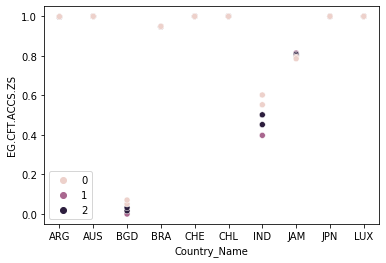

In [21]:
#Clustering the different countries based on PPP, GDP
sns.scatterplot(data=f, x="Country_Name", y="EG.CFT.ACCS.ZS", hue=kmeans.labels_)
plt.show()

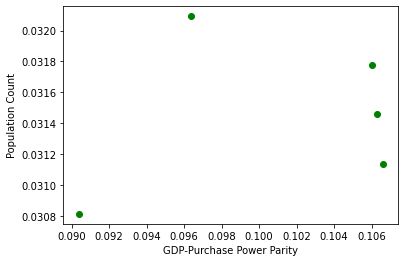

In [19]:
#Scatterplot visualisation for Total population vs GDP in terms of Purchase Power Parity for Argentina
data=f[(f['Country_Name']=='ARG')]
data1 = data.values
x, y = data1[:, 2], data1[:, 3]
plt.scatter(x, y,color="green")
plt.ylabel('Population Count')
plt.xlabel('GDP-Purchase Power Parity')
plt.show()

Covariance value->  [[ 2.03569905e-01 -1.02447324e-02  8.78797279e-04]
 [-1.02447324e-02  5.16969659e-04 -4.44065798e-05]
 [ 8.78797279e-04 -4.44065798e-05  3.81715858e-06]]
Parameter value->  [-0.96634858  0.09207131  0.00767537]


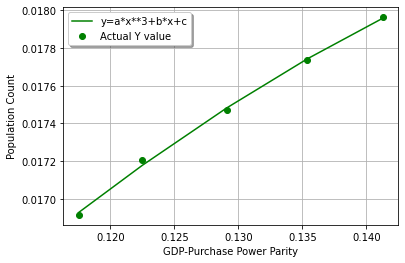

In [24]:
#Implementing the curve_fit function for Australia which has a high value of Clean fuels and technologies access for cooking
#Scatter plot will show the relationship between the Total population and GDP in terms of Purchase Power Parity
data2=f[(f['Country_Name']=='AUS')]
data3 = data2.values
x, y = data3[:, 2], data3[:, 3]

def func(x, a, b, c):
    return a*x**3+b*x+c
parametrs, covarince = curve_fit(func, x, y)
print("Covariance value-> ", covarince)
print("Parameter value-> ", parametrs)


parametrs, _ = curve_fit(func, x, y)
a, b, c = parametrs[0], parametrs[1], parametrs[2]
y_ft = a*x**3+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, y_ft, label="y=a*x**3+b*x+c",color="green")
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Population Count')
    plt.xlabel('GDP-Purchase Power Parity')
    plt.grid(True)
    plt.legend(fancybox=True, shadow=True,loc='best')
    plt.show() 

Covariance value->  [[ 0.23652479 -0.58049804  0.34713533]
 [-0.58049804  1.42982923 -0.8566531 ]
 [ 0.34713533 -0.8566531   0.51378002]]
Parameter value->  [-0.3135111   0.95983128  0.34564137]


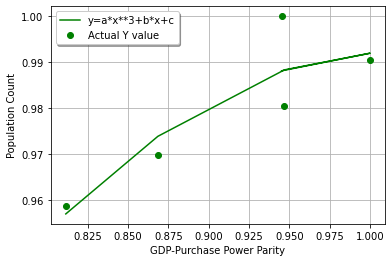

In [25]:
#Implementing the curve_fit function for India which has a medium value of Clean fuels and technologies access for cooking
#Scatter plot will show the relationship between the Total population and GDP in terms of Purchase Power Parity
data4=f[(f['Country_Name']=='IND')]
data5 = data4.values
x, y = data5[:, 2], data5[:, 3]

def func(x, a, b, c):
    return a*x**3+b*x+c
parametrs, covarince = curve_fit(func, x, y)
print("Covariance value-> ", covarince)
print("Parameter value-> ", parametrs)


parametrs, _ = curve_fit(func, x, y)
a, b, c = parametrs[0], parametrs[1], parametrs[2]
y_ft = a*x**3+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, y_ft, label="y=a*x**3+b*x+c",color="green")
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Population Count')
    plt.xlabel('GDP-Purchase Power Parity')
    plt.grid(True)
    plt.legend(fancybox=True, shadow=True,loc='best')
    plt.show() 

Covariance value->  [[ 5.68236054e+01 -1.31657513e+00  7.55917874e-02]
 [-1.31657513e+00  3.07032605e-02 -1.76886531e-03]
 [ 7.55917874e-02 -1.76886531e-03  1.02109020e-04]]
Parameter value->  [-0.47063826  0.19924255  0.09967601]


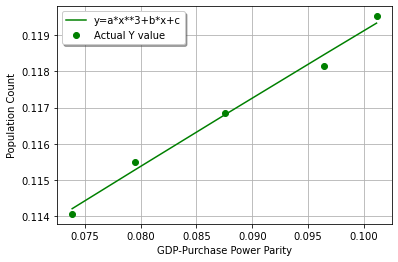

In [26]:
#Implementing the curve_fit function for Bangladesh which has a low value of Clean fuels and technologies access for cooking
#Scatter plot will show the relationship between the Total population and GDP in terms of Purchase Power Parity
data6=f[(f['Country_Name']=='BGD')]
data7 = data6.values
x, y = data7[:, 2], data7[:, 3]

def func(x, a, b, c):
    return a*x**3+b*x+c
parametrs, covarince = curve_fit(func, x, y)
print("Covariance value-> ", covarince)
print("Parameter value-> ", parametrs)


parametrs, _ = curve_fit(func, x, y)
a, b, c = parametrs[0], parametrs[1], parametrs[2]
y_ft = a*x**3+b*x+c

import warnings
with warnings.catch_warnings(record=True):
    plt.plot(x, y_ft, label="y=a*x**3+b*x+c",color="green")
    plt.plot(x, y, 'bo', label="Actual Y value",color="green")
    plt.ylabel('Population Count')
    plt.xlabel('GDP-Purchase Power Parity')
    plt.grid(True)
    plt.legend(fancybox=True, shadow=True,loc='best')
    plt.show() 

**We have draen 3 scatter plots using the curve_fit function and we have observed that for a country which has a high value of Clean fuels and technologies access for cooking, the correlation between the Total population and GDP in terms of Purchase Power Parity is positive. Similarly for countries with medium and low value of Clean fuels and technologies access for cooking, the correlation between the Total population and GDP in terms of Purchase Power Parity is positive.**

In [ ]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 